In [7]:
import sys
import cv2
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.mediapipe.model import mediapipe_model
from models.mediapipe.map_mp2coco import MP2COCO

# Read image

(3024, 4032, 3)


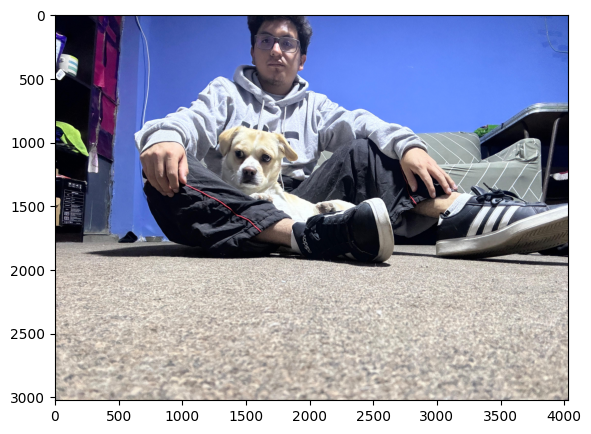

In [8]:
img     = cv2.imread("../../data/images/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.show()

# Load model

    face_config = {
        'min_detection_confidence': 0.5,
        'min_tracking_confidence': 0.5,
        'max_num_faces': 1,
        'refine_landmarks':True
    }

    hands_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'max_num_hands': 2,
        'model_complexity': 1
    }
                    
    pose_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'model_complexity': 2,
        'smooth_landmarks':True,
        'enable_segmentation':False,
        'smooth_segmentation':True
    }

    model = mediapipe_model(models= ['hand', 'face', 'pose'], image_mode= True, 
                    face_config= face_config, hands_config=hands_config, pose_config=pose_config)

In [9]:
model = mediapipe_model()

I0000 00:00:1715170256.500227 1128224 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715170256.501097 1128642 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
I0000 00:00:1715170256.506786 1128224 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715170256.507822 1128657 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
I0000 00:00:1715170256.517164 1128224 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715170256.518140 1128672 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)


In [10]:
results = model.predict(frame_rgb=img_rgb)

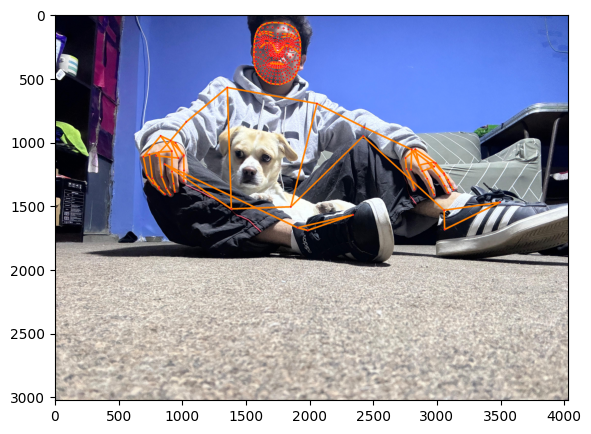

In [11]:
ldk_config = {
    'circle_radius':5,
    'thickness':4,
    'color':(255,0,0)
}
con_config = {
    'circle_radius':5,
    'thickness':12,
    'color':(255,128,0)
    #'color':(0,255,255)
}

img_rgb_new = model.draw_mediapipe(img_rgb,results,landmark_config=ldk_config,connection_config=con_config)
fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb_new)
plt.show()

Time: 0.0008749961853027344


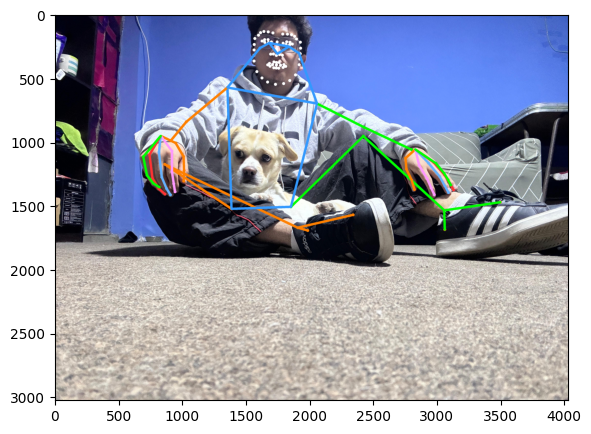

In [12]:
from rtmlib import Wholebody, draw_skeleton
import copy 
import time

maper = MP2COCO()

start = time.time()
keypoints_new, scores_new = maper.process(img_rgb,results)
print("Time:",time.time()-start)



img_rgb_new2 = copy.deepcopy(img_rgb)
img_rgb_new2 = draw_skeleton(img_rgb_new2, keypoints_new, scores_new, kpt_thr=0.5,
                             line_width=18,radius=12)

fig=plt.figure(figsize=(10,5))
plt.imshow(img_rgb_new2)
plt.show()
